IFSC 7399

Assignment 8 (Machine Learning Assignment 2)

Submitted to Prof Ningning Wu

Submitted by Deepak Singla

## Machine Learning Assignment 2

####This assignment uses the breast cancer dataset. Run the following code the load the data.

In [120]:
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
data = load_breast_cancer()

df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target'] = data.target
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### 1. Data profiling: print statsitic information include min, max, mean, and std of each numeric column.

In [121]:
#Data profiling: print statsitic information include min, max, mean, and std of each numeric column.
df_cancer.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [122]:
#print min of each numerica column
print("Min of each numeric column:")
dt_cancer_numericCols = df_cancer.select_dtypes(include='number')

print(dt_cancer_numericCols.min())


Min of each numeric column:
mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness     

In [123]:

#print max of each numerica column
print("Max of each numeric column:")
print(dt_cancer_numericCols.max())


Max of each numeric column:
mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness     

In [124]:

#print mean of each numeric column
print("Mean of each numeric column:")
print(dt_cancer_numericCols.mean())



Mean of each numeric column:
mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness    

In [125]:
#print std of each numeric column
print("Std of each numeric column:")
print(dt_cancer_numericCols.std())

Std of each numeric column:
mean radius                  3.524049
mean texture                 4.301036
mean perimeter              24.298981
mean area                  351.914129
mean smoothness              0.014064
mean compactness             0.052813
mean concavity               0.079720
mean concave points          0.038803
mean symmetry                0.027414
mean fractal dimension       0.007060
radius error                 0.277313
texture error                0.551648
perimeter error              2.021855
area error                  45.491006
smoothness error             0.003003
compactness error            0.017908
concavity error              0.030186
concave points error         0.006170
symmetry error               0.008266
fractal dimension error      0.002646
worst radius                 4.833242
worst texture                6.146258
worst perimeter             33.602542
worst area                 569.356993
worst smoothness             0.022832
worst compactness     

In [126]:
df_cancer.info()
dt_cancer_numericCols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### 2. Apply z-score normalization to numeric columns

In [127]:
dt_cancer_numericCols = pd.DataFrame(data.data, columns=data.feature_names)
dt_cancer_numericCols['target'] = data.target
dt_cancer_numericCols.head()

X = dt_cancer_numericCols.drop('target', axis=1)
y = dt_cancer_numericCols['target']

#split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
#after appltying z-score normalization to numeric columns

from scipy.stats import zscore

numericalColumns = df_cancer.select_dtypes(include='number')
df_cancer_zscore = numericalColumns.apply(zscore)


print("Train data after applying z-score norm \n ")
print (df_cancer_zscore)




Train data after applying z-score norm 
 
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness

#### 3. Build Decision Tree, SVM, and KNN classifiers on the original dataset, then compare their performances using k-fold cross validation.
**Note**: you can pick any n_neighbors for KNN.

In [129]:
#Build Decision Tree classifiers on the original dataset

# import the decision tree model
dt = DecisionTreeClassifier()

# train the DT model
dt.fit(X_train, y_train)

# make predictions on the test set
y_pred = dt.predict(X_test)

print(y_pred)

# calculate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)
precision_dt = precision_score(y_test, y_pred)
print("precion:", precision_dt)
recall_dt = recall_score(y_test, y_pred)
print("recall:", recall_dt)
f1_dt = f1_score(y_test, y_pred)
print("f1:", f1_dt)




[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 0]
Accuracy: 0.9385964912280702
precion: 0.9444444444444444
recall: 0.9577464788732394
f1: 0.951048951048951


In [130]:
from sklearn import tree

tree = tree.export_text(dt)
print(tree)

|--- feature_7 <= 0.05
|   |--- feature_20 <= 16.83
|   |   |--- feature_13 <= 48.70
|   |   |   |--- feature_24 <= 0.18
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_21 <= 27.76
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  27.76
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.35
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_24 >  0.18
|   |   |   |   |--- class: 0
|   |   |--- feature_13 >  48.70
|   |   |   |--- feature_6 <= 0.03
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.03
|   |   |   |   |--- class: 1
|   |--- feature_20 >  16.83
|   |   |--- feature_21 <= 19.91
|   |   |   |--- class: 1
|   | 

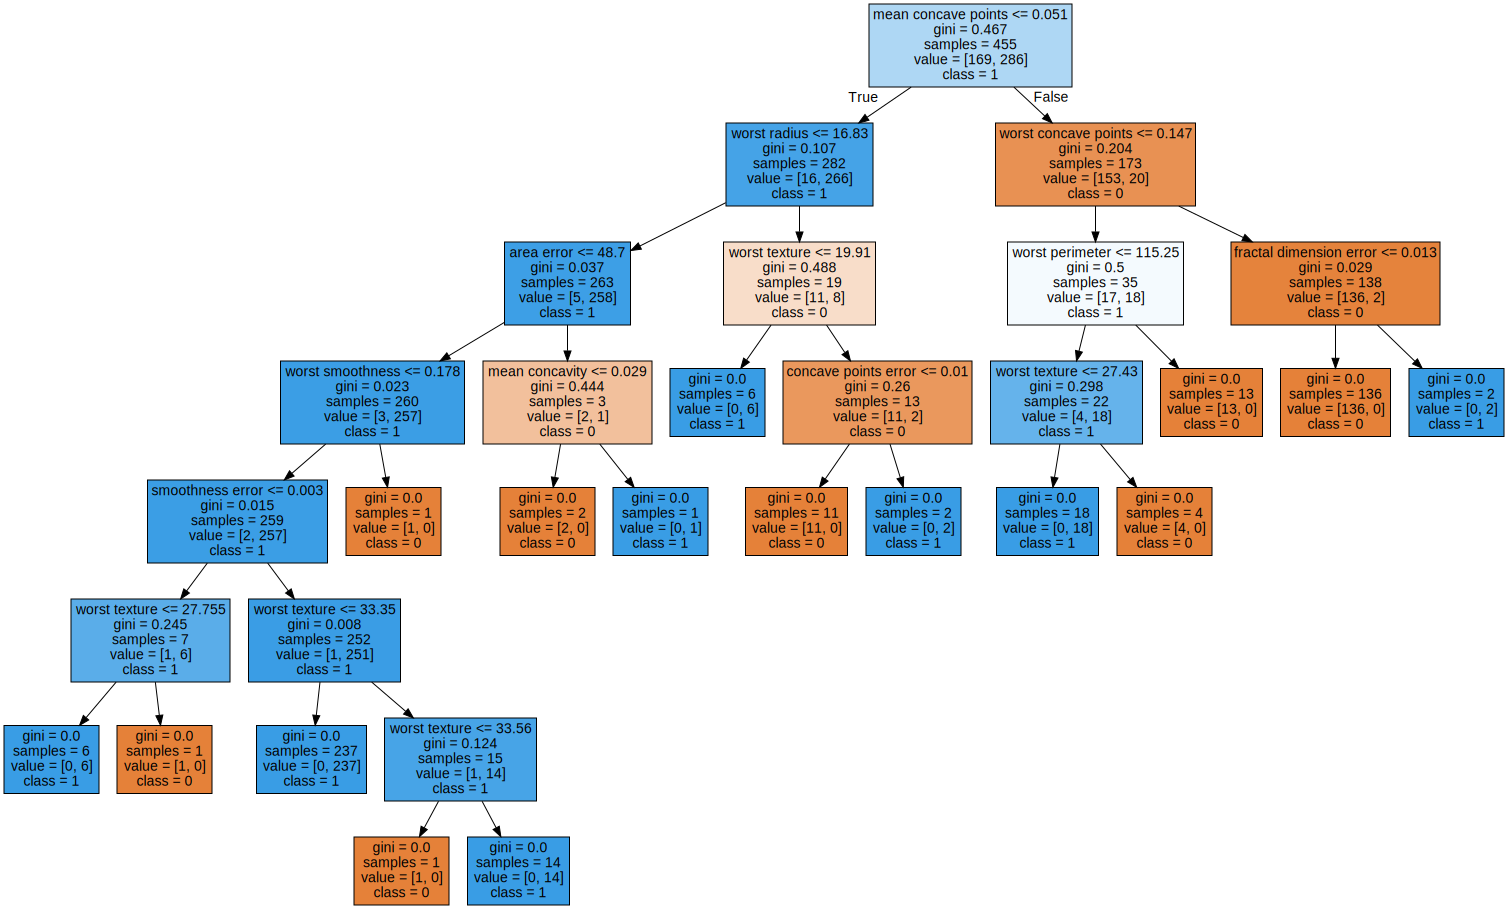

In [131]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
dot_data=export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True)
graph=graphviz.Source(dot_data)
graph

In [132]:
#Build SVM classifiers on the original dataset

print("SVM classifiers:")

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(y_pred)

# calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm)
precision_svm = precision_score(y_test, y_pred)
print("precion:", precision_svm)
recall_svm = recall_score(y_test, y_pred)
print("recall:", recall_svm)
f1_svm = f1_score(y_test, y_pred)
print("f1:", f1_svm)




SVM classifiers:
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
Accuracy: 0.9473684210526315
precion: 0.922077922077922
recall: 1.0
f1: 0.9594594594594594


In [133]:
print("KNN classifier")
k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"K = {k}")
    accuracy_knn = accuracy_score(y_test, y_pred)

    print(f"Accuracy_knn:", accuracy_knn)

    precision_knn = precision_score(y_test, y_pred)
    print("precison:", precision_knn)
    recall_knn = recall_score(y_test, y_pred)
    print("recall:", recall_knn)
    f1_knn = f1_score(y_test, y_pred)
    print("f1:", f1_knn)


KNN classifier
K = 1
Accuracy_knn: 0.9298245614035088
precison: 0.92
recall: 0.971830985915493
f1: 0.9452054794520548
K = 3
Accuracy_knn: 0.9298245614035088
precison: 0.9315068493150684
recall: 0.9577464788732394
f1: 0.9444444444444444
K = 5
Accuracy_knn: 0.956140350877193
precison: 0.9342105263157895
recall: 1.0
f1: 0.9659863945578231


Model Performance (Accuracy):

Decision Tree: 0.9103 (+/- 0.0229)
SVM: 0.9156 (+/- 0.0367)
kNN: 0.9350 (+/- 0.0293)


/tmp/ipython-input-2773486098.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


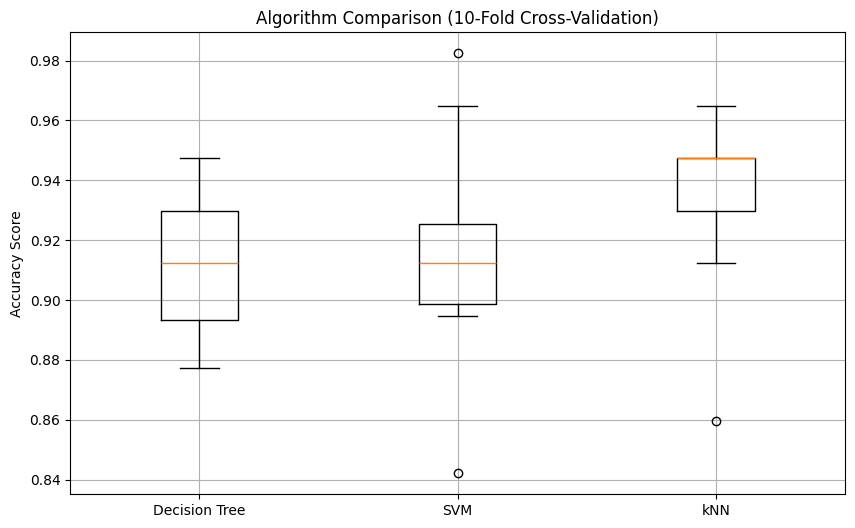

In [134]:
#Compare their performances using k-fold cross validation.
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "kNN": KNeighborsClassifier()
}

# Set up and run K-Fold Cross-Validation for each model
results = []
names = []
print("Model Performance (Accuracy):\n")

for name, model in models.items():
    # Use StratifiedKFold for classification
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Calculate cross-validated scores
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)

    # Print mean and std deviation of scores
    print(f"{name}: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

#Compare models with a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison (10-Fold Cross-Validation)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


#### 4. Build same set of classifiers (Decision Tree, SVM, and KNN) on the normalized data by z-score. Compare their performances using k-fold cross validation.
**Note**: For KNN classifer, use the same value of n_neighbors as question 3.

In [135]:
# Decision tree classification with zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#import the necessary lib
from scipy.stats import zscore

numericalColumns = df_cancer.select_dtypes(include='number')
df_cancer_zscore = numericalColumns.apply(zscore)
print (df_cancer_zscore)


df_cancer_zscore['target'] = data.target
df_cancer_zscore.head()

a = df_cancer_zscore.drop('target', axis=1)
b = df_cancer_zscore['target']

df_cancer_zscore['target'] = data.target

y_zscore = df_cancer_zscore.target
x_zscore = df_cancer_zscore.drop(columns=['target'])

x_train_z, x_test_z, y_train_z, y_test_z = train_test_split(x_zscore, y_zscore, test_size=0.3, random_state=142)

dt_zscore = DecisionTreeClassifier()
dt_zscore.fit(x_train_z, y_train_z)

y_pred_zscore = dt_zscore.predict(x_test_z)

accuracy_dt_z = accuracy_score(y_test_z, y_pred_zscore)
precision_dt_z = precision_score(y_test_z,y_pred_zscore)
recall_dt_z = recall_score(y_test_z, y_pred_zscore)
f1_dt_z= f1_score(y_test_z, y_pred_zscore)

print('accuracy: \t'+ str(accuracy_dt_z))
print('precision score: \t' + str(precision_dt_z))
print('recall score : \t' + str(recall_dt_z))
print('f1 score: \t'+ str(f1_dt_z))

from sklearn.metrics import classification_report
report_zscore=classification_report(y_test_z, y_pred_zscore)
print(report_zscore)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mea

In [136]:
#svm classifier using z-score norm values

svm = SVC()
svm.fit(x_train_z, y_train_z)
y_pred_svm = svm.predict(x_test_z)

print(y_pred_svm)

# calculate the accuracy of the model
accuracy_svm_z = accuracy_score(y_test_z, y_pred_svm)
print("Accuracy:", accuracy_svm_z)
precision_svm_z = precision_score(y_test_z, y_pred_svm)
print("precision:", precision_svm_z)
recall_svm_z = recall_score(y_test_z, y_pred_svm)
print("recall:", recall_svm_z)
f1_svm_z = f1_score(y_test_z, y_pred_svm)
print("f1:", f1_svm_z)


[0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0
 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1
 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0]
Accuracy: 0.9824561403508771
precision: 0.9807692307692307
recall: 0.9902912621359223
f1: 0.9855072463768116


In [137]:
print("KNN classifier")

k_values = [1, 3, 5]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_z, y_train_z)
    y_pred_knn = knn.predict(x_test_z)

    print(f"K = {k}")
    accuracy_knn_z = accuracy_score(y_test, y_pred)

    print(f"Accuracy_knn:", accuracy_knn_z)

    precision_knn_z = precision_score(y_test, y_pred)
    print("precison:", precision_knn_z)
    recall_knn_z= recall_score(y_test, y_pred)
    print("recall:", recall_knn_z)
    f1_knn_z = f1_score(y_test, y_pred)
    print("f1:", f1_knn_z)

KNN classifier
K = 1
Accuracy_knn: 0.956140350877193
precison: 0.9342105263157895
recall: 1.0
f1: 0.9659863945578231
K = 3
Accuracy_knn: 0.956140350877193
precison: 0.9342105263157895
recall: 1.0
f1: 0.9659863945578231
K = 5
Accuracy_knn: 0.956140350877193
precison: 0.9342105263157895
recall: 1.0
f1: 0.9659863945578231


In [138]:
#import the necessary lib
from scipy.stats import zscore

numericalColumns = df_cancer.select_dtypes(include='number')
df_cancer_zscore = numericalColumns.apply(zscore)
print (df_cancer_zscore)


df_cancer_zscore['target'] = data.target
df_cancer_zscore.head()

a = df_cancer_zscore.drop('target', axis=1)
b = df_cancer_zscore['target']

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mea

Model Performance (Accuracy):

Decision Tree: 0.9139 (+/- 0.0276)
SVM: 0.9754 (+/- 0.0195)
kNN: 0.9701 (+/- 0.0176)


/tmp/ipython-input-2666252709.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


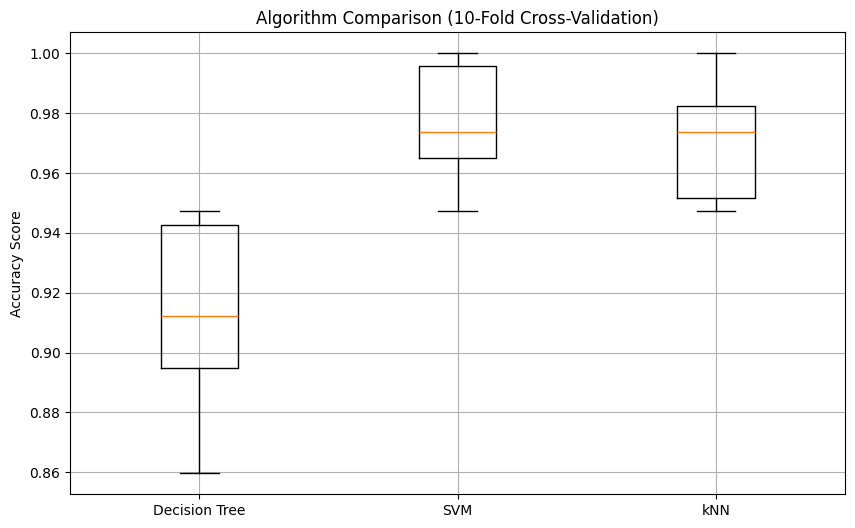

In [139]:

#Compare their performances using k-fold cross validation.
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "kNN": KNeighborsClassifier()
}

# 3. Set up and run K-Fold Cross-Validation for each model
results = []
names = []
print("Model Performance (Accuracy):\n")

for name, model in models.items():
    # Use StratifiedKFold for classification
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Calculate cross-validated scores
    cv_results = cross_val_score(model, a,b, cv=kfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)

    # Print mean and std deviation of scores
    print(f"{name}: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

# Compare models with a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison (10-Fold Cross-Validation)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


#### 5. For each classifier, compare their performance in question 3 and question 4.

In [143]:
# comparing performance of Dicision tree, SVM and KNN classifiers in question 3 and question 4.
performanceReviewMatrix = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Decision Tree (Original)': [accuracy_dt, precision_dt, recall_dt, f1_dt],
    'Decision Tree (Normalized)': [accuracy_dt_z, precision_dt_z, recall_dt_z, f1_dt_z],
    'SVM (Original)': [accuracy_svm, precision_svm, recall_svm, f1_svm],
    'SVM (Normalized)': [accuracy_svm_z, precision_svm_z, recall_svm_z, f1_svm_z],
    'kNN (Original, k=5)': [accuracy_knn, precision_knn, recall_knn, f1_knn],
    'kNN (Normalized, k=5)': [accuracy_knn_z, precision_knn_z, recall_knn_z, f1_knn_z]
}


df_metrics = pd.DataFrame(performanceReviewMatrix)

print(df_metrics)

print("Accuracy: \n")
print("Decision Tree: \n")
print(f"Original data accuracy: {accuracy_dt}")
print(f"Normalized data accuracy: {accuracy_dt_z}")
print("The decision tree's performance is slightly worse on the normalized data.")

print("\nSVM:")
print(f"Original data accuracy: {accuracy_svm}")
print(f"Normalized data accuracy: {accuracy_svm_z}")
print("The SVM's performance is significantly better on the normalized data.")

print("\nkNN:")
print(f"Original data accuracy (k=5): {accuracy_knn}")
print(f"Normalized data accuracy (k=5): {accuracy_knn_z}")
print("The kNN's performance is slightly worse on the normalized data.")

print("\n")

print("Precision \n")
print("Decision Tree:")
print(f"Original data precision: {precision_dt}")
print(f"Normalized data precision: {precision_dt_z}")
print("The decision tree's performance is slightly worse on the normalized data.")

print("\nSVM:")
print(f"Original data precision: {precision_svm}")
print(f"Normalized data precision: {precision_svm_z}")
print("The SVM's performance is significantly better on the normalized data.")

print("\nkNN:")
print(f"Original data precision (k=5): {precision_knn}")
print(f"Normalized data precision (k=5): {precision_knn_z}")
print("The kNN's performance is slightly worse on the normalized data.")

print("\n")
print("Recall: \n")
print("\n Decision Tree:")
print(f"Original data recall: {recall_dt}")
print(f"Normalized data recall: {recall_dt_z}")
print("The decision tree's performance is slightly worse on the normalized data.")

print("\nSVM:")
print(f"Original data recall: {recall_svm}")
print(f"Normalized data recall: {recall_svm_z}")
print("The SVM's performance is same.")

print("\nkNN:")
print(f"Original data recall (k=5): {recall_knn}")
print(f"Normalized data recall (k=5): {recall_knn_z}")
print("The kNN's performance is same.")

print("\n")

print("F-1 score: \n")
print("\n Decision Tree:")
print(f"Original data F-1 score: {f1_dt}")
print(f"Normalized data F-1 score: {f1_dt_z}")
print("The decision tree's performance is slightly worse on the normalized data.")

print("\nSVM:")
print(f"Original data F-1 score: {f1_svm}")
print(f"Normalized data F-1 score: {f1_svm_z}")
print("The SVM's performance is significantly better on the normalized data.")

print("\nkNN:")
print(f"Original data F-1 score (k=5): {f1_knn}")
print(f"Normalized data F-1 score (k=5): {f1_knn_z}")
print("The kNN's performance is slightly worse on the normalized data.")

#Please note only the last KNN value is diplayed here on table knn =5 in this case

      Metric  Decision Tree (Original)  Decision Tree (Normalized)  \
0   Accuracy                  0.947368                    0.935673   
1  Precision                  0.957746                    0.960000   
2     Recall                  0.957746                    0.932039   
3   F1-Score                  0.957746                    0.945813   

   SVM (Original)  SVM (Normalized)  kNN (Original, k=5)  \
0        0.947368          0.982456             0.956140   
1        0.922078          0.980769             0.934211   
2        1.000000          0.990291             1.000000   
3        0.959459          0.985507             0.965986   

   kNN (Normalized, k=5)  
0               0.982456  
1               0.971698  
2               1.000000  
3               0.985646  
Accuracy: 

Decision Tree: 

Original data accuracy: 0.9473684210526315
Normalized data accuracy: 0.935672514619883
The decision tree's performance is slightly worse on the normalized data.

SVM:
Original data acc